# <center>Cartografia</center>

## <center>TP - Análise geográfica do Covid-19</center>

<center>João Leal - A75569</center>

# Introdução

&emsp;Este trabalho prático visa explorar graficamente egeograficamente a informação sobre o COVID-19, usando algumas ferramentas que auxiliem a análise, manipulação e visualização da informação geográfica ao nosso dispôr, como por exemplo **pandas**, **matplotlib** e o **Qgis**.

&emsp;Assim sendo, e recorrendo a estas ferramentas, foi possível criar gráficos relativos à pandemia atual de *COVID-19* e criar mapas e animações que permitem a visualização do desenvolvimento da pandemia, assim como as emissões de poluentes atmosféricos ao longo dela. 

(Embora não tenha conseguido meter a correr a ferramenta do **Qgis** juntamente com o Notebook, a mesma foi usada para a elaboração dos mapas e animações aqui presentes, usando os datasets mencionados)

In [1]:
import re
import csv 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
from IPython.display import HTML, display

# 1 - Desenvolvimento do COVID-19

&emsp;Nesta primeira parte do trabalho, foram usados dois datasets, um que mostra os dados a nível mundial e outro a nível nacional (disponibilizado pela DGS).

&emsp;Para estes, foram elaborados gráficos que visam mostrar de forma simples a quantidade de casos confirmados em cada país. A nível nacional são apresentadas algumas estatísticas gerais relativas a casos confirmados, recuperados e óbitos.

In [2]:
GLOBAL_FILEPATH = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

data_global = pd.read_csv(GLOBAL_FILEPATH)

data_global = data_global.groupby(['Country/Region']).sum().reset_index()
data_global = data_global.rename(columns={"Country/Region": "Country"})
data_global.set_index("Country", inplace=True)

data_global.head(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


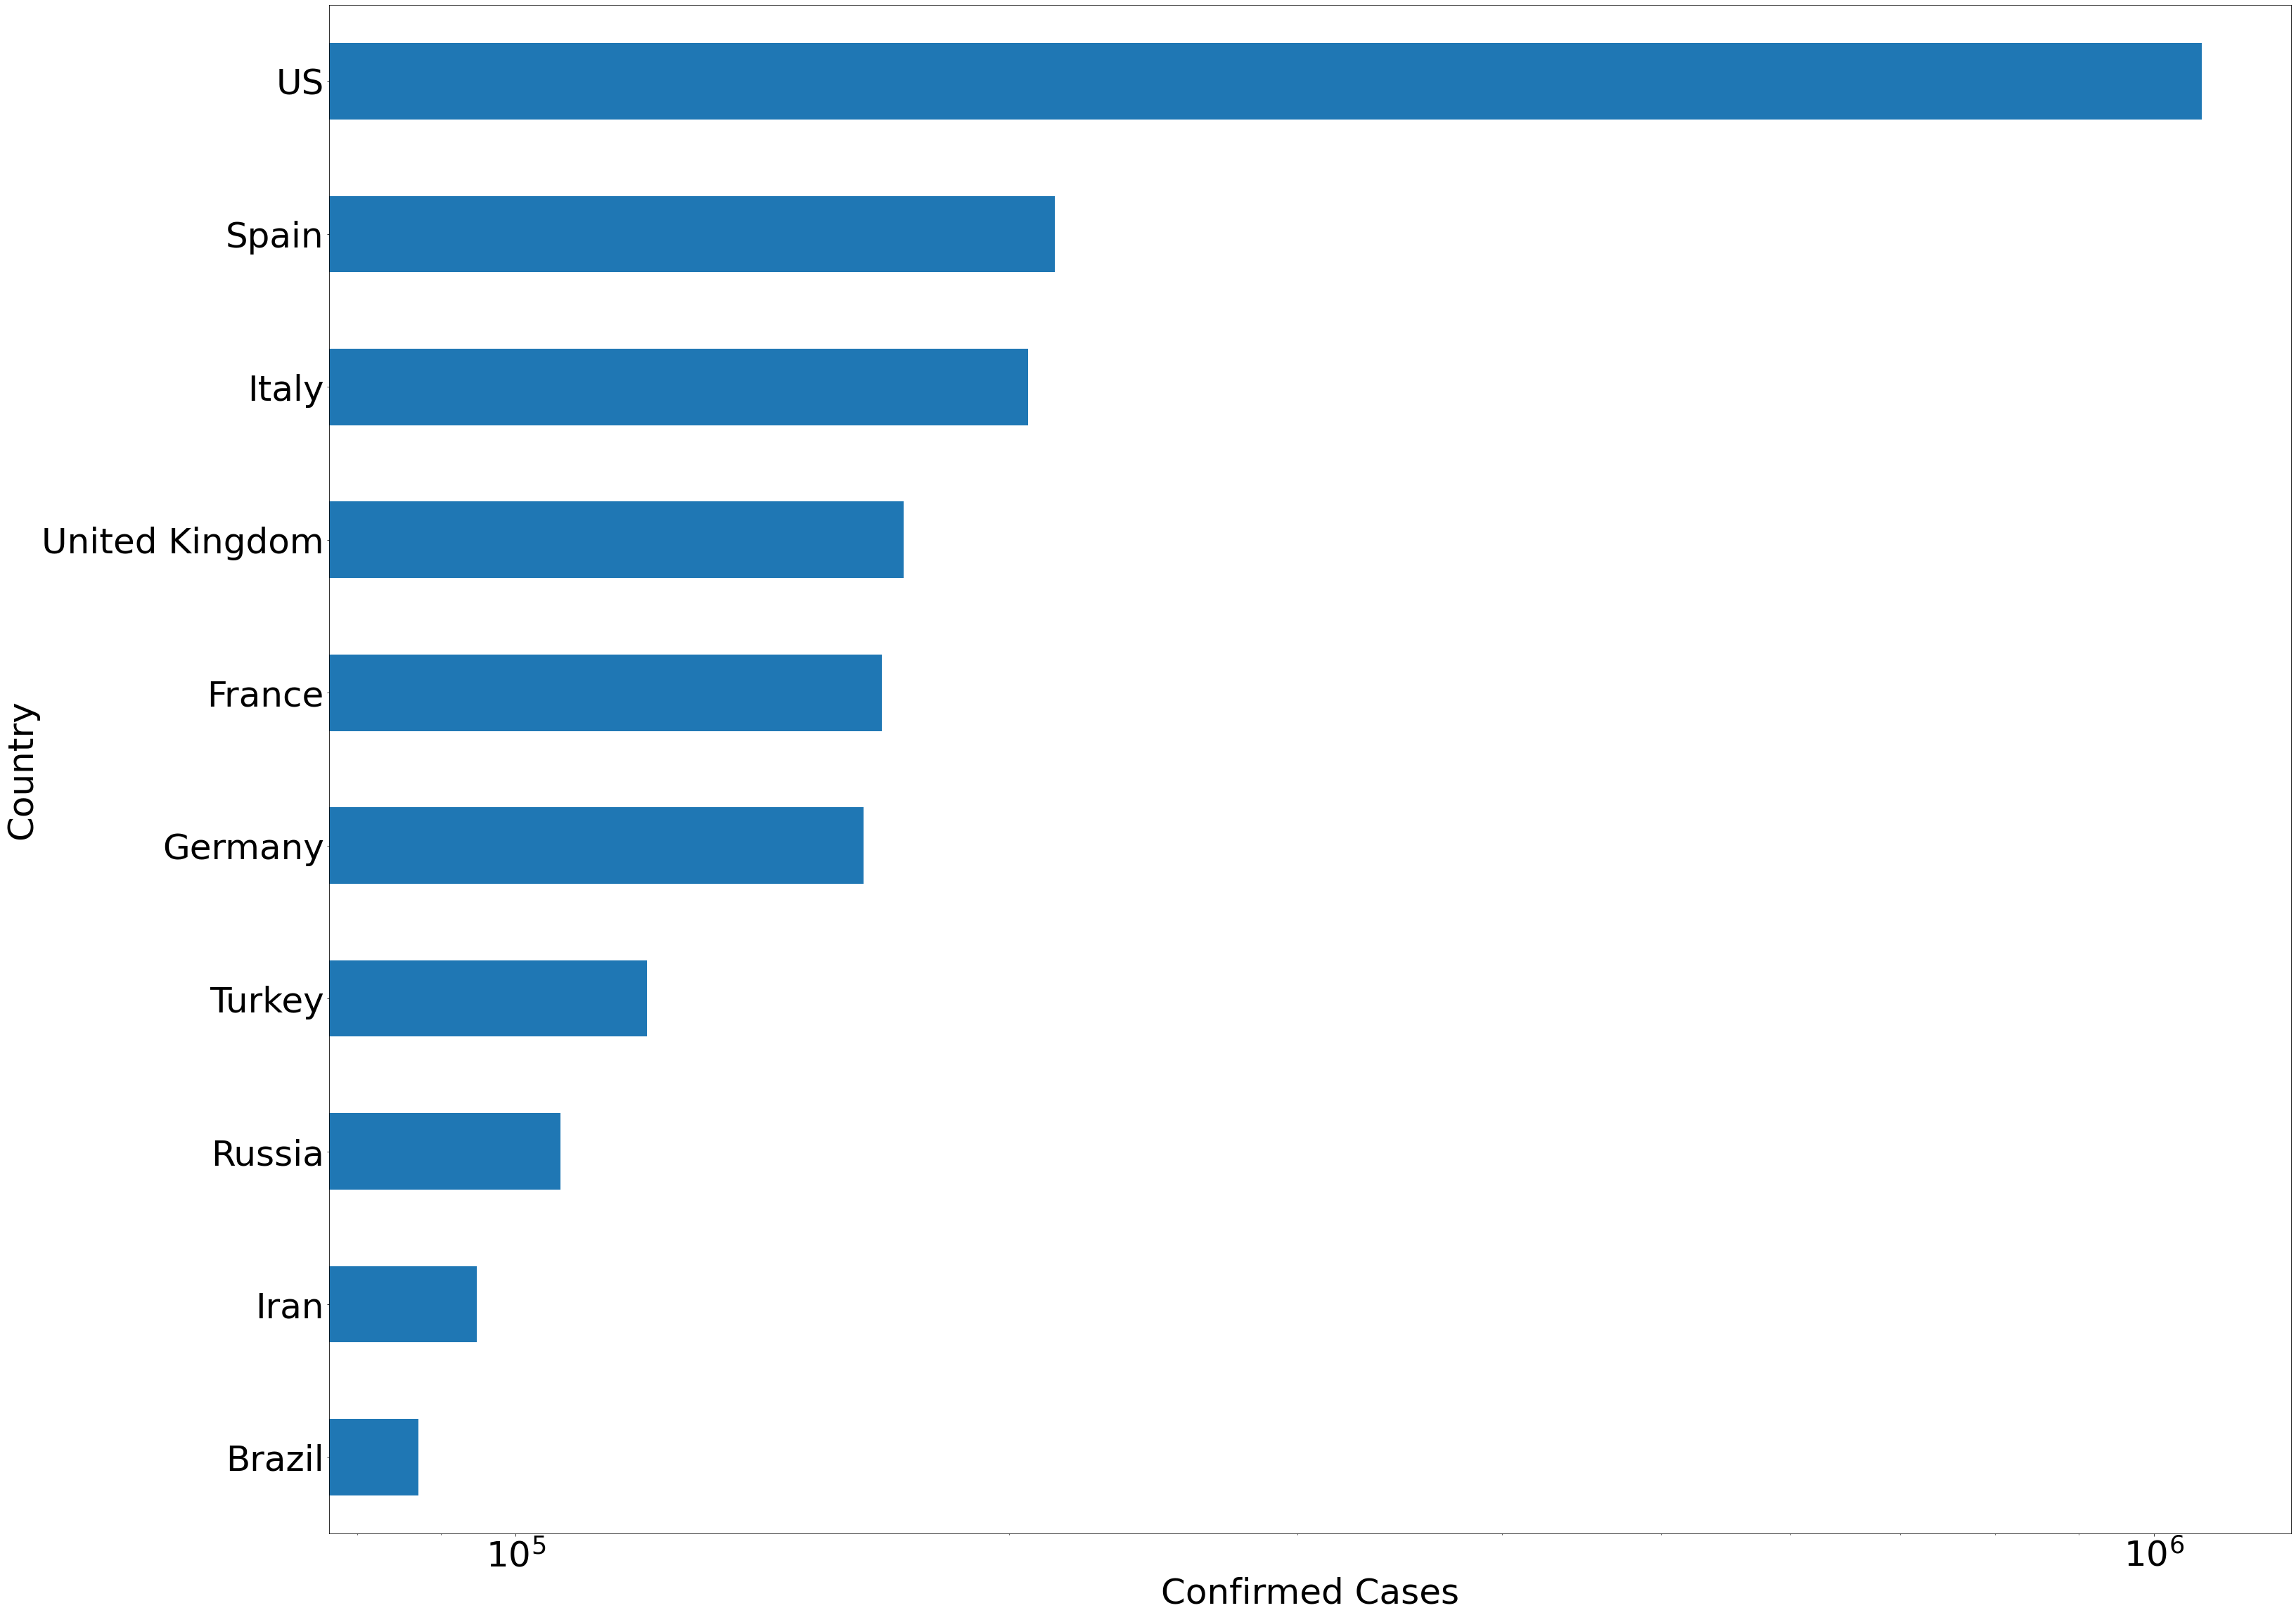

In [3]:
date = data_global.columns.tolist()[-1]

matplotlib.pyplot.xticks(fontsize=50)
matplotlib.pyplot.yticks(fontsize=50)

sumdata = data_global[date]
sumdata = sumdata.sort_values(ascending=True)[-10:]
sumdata.plot.barh(figsize=(50,40))
plt.xscale("log")
plt.xlabel('Confirmed Cases',fontsize=50)
plt.ylabel('Country',fontsize=50)
plt.show()

In [5]:
NATIONAL_FILEPATH = "https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv"

data_national = pd.read_csv(NATIONAL_FILEPATH)
data_national.head(5)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


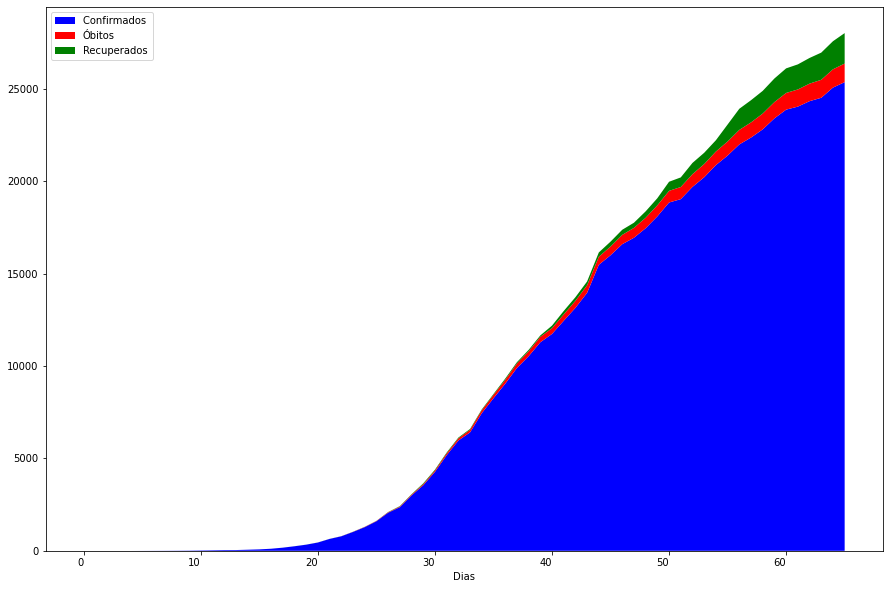

In [6]:
x = data_national.index
y1 = data_national.confirmados
y2 = data_national.obitos
y3 = data_national.recuperados

y = np.vstack([y1, y2, y3])

labels = ["Confirmados ", "Óbitos", "Recuperados"]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

plt.setp(plt.gca().get_xticklabels(), ha="right")
plt.xlabel("Dias")

ax.stackplot(x,y1, y2, y3, colors=("blue","red","green"),labels=labels)
ax.legend(loc='upper left')
plt.show()

## Visualização da propagação mundial

&emsp;Recorrendo ao **Qgis** é possível obter uma animação que demonstra a propagação do *Covid-19*. Para tal, foi usado um *heatmap* para que fica mais brilhante nas zonas mais afetadas. Para este efeito, usamos o ficheiro *geoJson* disponibilizado

&emsp; Como resultado, conseguimos obter a seguinte animação do desenvolvimento da pandemia.

![SegmentLocal](./images/covid_tracing.gif "segment")

&emsp;A animação começa no *01/03/2020* e tem fim em *15/03/2020*, com uma *frame size* de 2 dias

# 2 - Impacto do Covid-19 na poluição

&emsp;Devido ao confinamento provocado pela pandemia atual, muitas atividades com impacto na poluição atmosférica foram reduzidas, como por exemplo a circulação em viaturas e o funcionamento de fábricas. Estas atividades emitem óxidos de azoto, em especial o dióxido de azoto (**NO2**). Assim sendo, decidi estudar a evolução dos níveis médios de **NO2** presentes no mundo usando o dataset fornecido pela *Air Quality Open Data Platform* (https://aqicn.org/data-platform/covid19/pt/), que conta com mais de 380 grandes cidades e rastreia diferentes poluentes e dados metereológicos, desde Janeiro de 2020 até ao dia de hoje, sendo atualizado 3 vezes por dia.

## Análise do Dataset

&emsp;Numa primeia fase, procedi a uma análise dos diferentes poluentes e fatores metereológicos presentes no dataset, para depois filtrar apenas a informação que será necessária para o estudo.

In [7]:
## CSV Header -> [Date, Country, City, Specie, count, min, max, median, variance]
                 # 0  ,    1   ,  2  ,   3   ,   4  ,  5 ,  6 ,   7   ,    8    
    
parameters = set()

with open('waqi-covid19-airqualitydata-2020.csv','r') as file_in:
    read = csv.reader(file_in, delimiter=',', skipinitialspace=True)
    next(read)
    
    for row in read:
        parameters.add(row[3])

print(f"Tracking the following parameters:\n")
for p in parameters:
    print('->',p)

Tracking the following parameters:

-> mepaqi
-> dew
-> pm25
-> pressure
-> pm10
-> precipitation
-> pol
-> co
-> so2
-> wd
-> wind-gust
-> humidity
-> no2
-> temperature
-> aqi
-> wind speed
-> uvi
-> pm1
-> o3
-> neph
-> wind-speed
-> wind gust


&emsp;Para este estudo apenas precisamos dos valores de **NO2**, podendo desprezar os restantes poluentes e dados metereológicos. Além disso, é de notar que este dataset não contém as coordenadas geográficas das diferentes cidades que estão presentes, tendo de ser necessário recorrer a um módulo **geoPY** do python para conseguir obter essas mesmas coordenadas sendo apenas necessário dar o *country code* e o nome da cidade.

&emsp;Primeiramente, filtramos o dataset inicial de forma a obter apenas os valores de **NO2**. Após esta filtragem, iteramos sobre o resultado obtido, adicionando o país e cidade em cada linha a um *set* denominado *addresses* e juntamos a informação filtrada numa lista à parte. 

&emsp;Em seguida, será necessário calcular as coordenadas geográficas para cada cidade. Para tal, iteramos sobre o *set addresses* recentemente criado e usamos o modulo **geoPY** para obter o par de coordenadas geográficas *(Longitude,Latitude)* que será adicionado a uma lista de pares de coordenadas.

&emsp;Por fim, juntamos as listas que contém as informações filtradas e as coordenadas geográficas, escrevendo o seu resultado para um ficheiro denominado *no2_tracking.csv*.

In [8]:
geolocator = Nominatim(user_agent="Cartografia",timeout=10)
addresses = set()

out_header = ['Date','Country','City','no2_mean','Longitude','Latitude',]

result = list()

with open('waqi-covid19-airqualitydata-2020.csv','r') as file_in, open('no2_tracking.csv','w') as file_out:

    read = csv.reader(file_in, delimiter=',', skipinitialspace=True)
    next(read)

    filtered_no2 = filter(lambda x: x[3] in ("no2"), read)
    sorted_no2 = sorted(filtered_no2, key=lambda row: (row[1], row[2], row[0]))
 
    for row in sorted_no2:
        addresses.add(f"{row[1]} {row[2]}")  # Add "{Country Code} {City}" to address set
        
        if(not "2019" in row[0]):
            result.append([row[0],row[1],row[2],row[7]])

    addresses = sorted(list(addresses))

    coordinates = list()    
    
    for i,adr in enumerate(addresses):
        print(i,'->',adr)
        location = geolocator.geocode(adr)
        coordinates.append((location.longitude,location.latitude))

    coords_by_address = dict(zip(addresses,coordinates))

    print("# Adresses found = ",len(addresses))
    print("# Coordinates found = ",len(coordinates))

    out = csv.writer(file_out)
    out.writerow(out_header)

    for row in result:
        out.writerow(row + list(coords_by_address[f"{row[1]} {row[2]}"])) 

0 -> AE Abu Dhabi
1 -> AR Buenos Aires
2 -> AT Graz
3 -> AT Innsbruck
4 -> AT Linz
5 -> AT Salzburg
6 -> AT Vienna
7 -> AU Adelaide
8 -> AU Brisbane
9 -> AU Canberra
10 -> AU Darwin
11 -> AU Melbourne
12 -> AU Newcastle
13 -> AU Perth
14 -> AU Sydney
15 -> AU Wollongong
16 -> BA Sarajevo
17 -> BA Tuzla
18 -> BA Zenica
19 -> BE Antwerpen
20 -> BE Brussels
21 -> BE Charleroi
22 -> BE Gent
23 -> BE Liège
24 -> BE Namur
25 -> BG Burgas
26 -> BG Plovdiv
27 -> BG Sofia
28 -> BO Cochabamba
29 -> BR São José dos Campos
30 -> BR São Paulo
31 -> BR Vitória
32 -> CA Calgary
33 -> CA Edmonton
34 -> CA Halifax
35 -> CA Hamilton
36 -> CA Kitchener
37 -> CA London
38 -> CA Mississauga
39 -> CA Montréal
40 -> CA Ottawa
41 -> CA Québec
42 -> CA Surrey
43 -> CA Toronto
44 -> CA Vancouver
45 -> CA Victoria
46 -> CA Winnipeg
47 -> CH Zürich
48 -> CL Calama
49 -> CL Concepción
50 -> CL Quilpué
51 -> CL Santiago
52 -> CL Talca
53 -> CL Temuco
54 -> CN Anyang
55 -> CN Beijing
56 -> CN Changchun
57 -> CN Chan

450 -> TW Hsinchu
451 -> TW Kaohsiung
452 -> TW Keelung
453 -> TW Taichung
454 -> TW Tainan
455 -> TW Taipei
456 -> TW Taitung City
457 -> TW Taoyuan City
458 -> US Albuquerque
459 -> US Atlanta
460 -> US Baltimore
461 -> US Boise
462 -> US Boston
463 -> US Brooklyn
464 -> US Chicago
465 -> US Columbus
466 -> US Denver
467 -> US Detroit
468 -> US El Paso
469 -> US Fresno
470 -> US Hartford
471 -> US Indianapolis
472 -> US Jackson
473 -> US Jacksonville
474 -> US Las Vegas
475 -> US Los Angeles
476 -> US Manhattan
477 -> US Milwaukee
478 -> US Oakland
479 -> US Oklahoma City
480 -> US Philadelphia
481 -> US Phoenix
482 -> US Portland
483 -> US Providence
484 -> US Queens
485 -> US Raleigh
486 -> US Richmond
487 -> US Sacramento
488 -> US Saint Paul
489 -> US Salt Lake City
490 -> US San Diego
491 -> US San Francisco
492 -> US San Jose
493 -> US Seattle
494 -> US Staten Island
495 -> US The Bronx
496 -> US Tucson
497 -> US Washington D.C.
498 -> VN Haiphong
499 -> VN Hanoi
500 -> VN Huế


&emsp;Recorrendo agora ao **QGis** foi possível gerar um *GIF* através do *CSV* gerado anteriormente que mostra a evolução dos valores de **NO2**, como podemos ver abaixo.

### <center>GIF da evolução de valores NO2</center>

![SegmentLocal](./images/no2_tracing.gif "segment")

### <center>Side-by-Side de valores NO2, no início e fim de cada mês</center>

In [9]:
display(HTML("<table><tr><td><img src='./images/no2_MAR_BEG.png'></td><td><img src='./images/no2_MAR_END.png'></td></tr></table>"))

,


<center>Março</center>

In [10]:
display(HTML("<table><tr><td><img src='./images/no2_APR_BEG.png'></td><td><img src='./images/no2_APR_END.png'></td></tr></table>"))

,


<center>Abril</center>

&emsp;Tendo em conta que a pandemia se começou a propagar mais a inícios de Março (na Europa), podemos ver um decrescimento na quantidade deste poluente ao longo deste mês, sendo este também notável em Abril, possivelmente devido à menor circulação de viaturas e ao fecho de uma quantidade substancial de fábricas.